<a href="https://colab.research.google.com/github/kashish-110/kashish-110/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing Libraries


In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import dataset

In [2]:
data=keras.datasets.mnist

In [3]:
data

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [4]:
(x_train, y_train),(x_test,y_test)=data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
x_train.shape #there are 60000 images and each image has dimension of 28 by 28

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

flatten the x_train and x_test

In [7]:
flat_x_train = x_train.reshape(len(x_train),28*28) #to  make a single matrix
flat_x_test=x_test.reshape(len(x_test),28*28)

model training

In [14]:
model =keras.Sequential([keras.layers.Dense(units=10, input_shape=(784,),activation='sigmoid')])
model.compile(
    optimizer = 'Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.fit(flat_x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3493 - loss: 18.2202
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3726 - loss: 5.9083
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3545 - loss: 5.9530
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3489 - loss: 5.4186
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3477 - loss: 5.3496


perform feature scaling

In [16]:
new_x_train = x_train/255
new_x_test=x_test/255

In [17]:
flat_new_x_train=new_x_train.reshape(len(new_x_train),28*28)
flat_new_x_test=new_x_test.reshape(len(new_x_test),28*28)

In [18]:
model =keras.Sequential([keras.layers.Dense(units=10, input_shape=(784,),activation='sigmoid')])
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(flat_new_x_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8109 - loss: 0.7172
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9145 - loss: 0.3066
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9218 - loss: 0.2782
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9245 - loss: 0.2734
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9294 - loss: 0.2565


In [19]:
model.evaluate(flat_new_x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9163 - loss: 0.3045


[0.2682567238807678, 0.927299976348877]

In [20]:
y_pred=model.predict(flat_new_x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
y_pred[0]

array([4.18427810e-02, 3.33734704e-07, 8.99740607e-02, 9.66577053e-01,
       2.65402091e-03, 1.26358390e-01, 1.20176321e-06, 9.99821246e-01,
       1.22792125e-01, 6.54043257e-01], dtype=float32)

In [22]:
y_pred_label = [np.argmax(i) for i in y_pred]

In [23]:
y_pred_label

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(6),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(2),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

In [25]:
# confusion matrix

cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred_label)

Text(95.72222222222221, 0.5, 'Predicted Value')

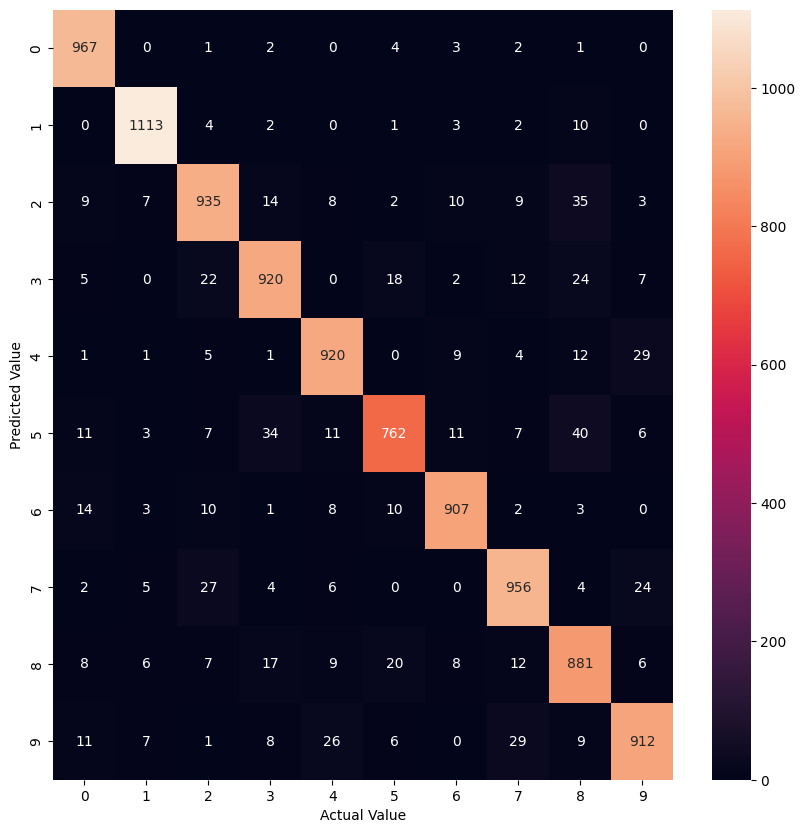

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')